<a href="https://colab.research.google.com/github/danilodcabotelho/DSWP_alunos/blob/main/C%C3%B3pia_de_Exercicio_1_NB15_00_ML_Nelio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# EXERCÍCIO 1 - NB_15_00_ML_Nelio_Machado
### Colaciono alguns banners com a linguagem, Conceitos e Funções pré-criadas



![Scikit-Learn](https://github.com/MathMachado/Materials/blob/master/scikit-learn-1.png?raw=true)



## Confusion Matrix
* Termos associados à Confusion Matrix:
    * **Verdadeiro Positivo** (TP = True Positive): Quando o valor observado é True e o modelo estima como True. Ou seja, o modelo acertou na estimativa.
        * Exemplo: **Observado**: Fraude (Positive); **Modelo**: Fraude (Positive) --> Modelo acertou!
    * **Verdadeiro Negativo** (TN = True Negative): Quando o valor observado é False e o modelo estima como False. Ou seja, o modelo acertou na estimativa;
        * Exemplo: **Observado**: NÃO-Fraude (Negative); **Modelo**: NÃO-Fraude (Negative) --> Modelo acertou!
    * **Falso Positivo** (FP = False Positive): Quando o valor observado é False e o modelo estima como True. Ou seja, o modelo errou na estimativa. 
        * Exemplo: **Observado**: NÃO-Fraude (Negative); **Modelo**: Fraude (Positive) --> Modelo errou!
    * **Falso Negativo** (FN = False Negative): Quando o valor observado é True e o modelo estima como False.
        * Exemplo: **Observado**: Fraude (Positive); **Modelo**: NÃO-Fraude (Negative) --> Modelo errou!

* Consulte [Confusion matrix](https://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html#sphx-glr-auto-examples-model-selection-plot-confusion-matrix-py)

![ConfusionMatrix](https://github.com/MathMachado/Materials/blob/master/ConfusionMatrix.PNG?raw=true)

Source: [Confusion Matrix](https://subscription.packtpub.com/book/big_data_and_business_intelligence/9781838555078/6/ch06lvl1sec34/confusion-matrix)


# Abaixo as Métricas a obter da Matriz Confusão (Confusion-Matrix):
##Accuracy
##Precision (Specificity)
##Recall (Sensitivity)
##Specificity
##F1-Score


## Accuracy
> Accuracy - é o número de previsões corretas feitas pelo modelo.

Responde à seguinte pergunta:

```
Com que frequência o classificador (modelo preditivo) classifica corretamente?
```

$$Accuracy= \frac{TP+TN}{TP+TN+FP+FN}$$

## Precision (ou Specificity)
> **Precision** - fornece informações sobre o desempenho em relação a Falsos Positivos (quantos capturamos).

Responde à seguinte pergunta:

```
Com relação ao resultado Positivo, com que frequência o classificador está correto?
```


$$Precision= \frac{TP}{TP+FP}$$

**Exemplo**: Precison nos dirá a proporção de clientes que o modelo estimou como sendo Fraude quando, na verdade, são fraude.

**Comentário**: Se nosso foco é minimizar Falso Negativos (FN), então precisamos nos esforçar para termos Recall próximo de 100%.

## Recall (ou Sensitivity)
> **Recall** - nos fornece informações sobre o desempenho de um classificador em relação a Falsos Negativos (quantos perdemos).

Responde à seguinte pergunta:

```
Quando o valor observado é Positivo, com que frequência o classificador está correto?
```

$$Recall = Sensitivity = \frac{TP}{TP+FN}$$

**Exemplo**: Recall é a proporção de clientes observados como Fraude e que o modelo estima como Fraude.

**Comentário**: Se nosso foco for minimizar Falso Positivos (FP), então precisamos nos esforçar para fazer Precision mais próximo de 100% possível.

## Specificity
> **Specificity** - proporção de TN por TN+FP.

Responde à seguinte pergunta:

```
Quando o valor observado é Negativo, com que frequência o classificador está correto?
```

**Exemplo**: Specificity é a proporção de clientes NÃO-Fraude que o modelo estima como NÃO-Fraude.

$$Specificity= \frac{TN}{TN+FP}$$

## F1-Score
> F1-Score é a média harmônica entre Recall e Precision e é um número entre 0 e 1. Quanto mais próximo de 1, melhor. Quanto mais próximo de 0, pior. Ou seja, é um equilíbrio entre Recall e Precision.

$$F1\_Score= 2\left(\frac{Recall*Precision}{Recall+Precision}\right)$$

## FUNÇÃO PARA APLICAR O CROSS-VALIDATION

In [104]:
# FUNÇÃO PARA O CROSS-VALIDATION com CROSS-VAL-SCORE

# Cross-Validation
from sklearn.model_selection import cross_val_score # Para o CV (Cross-Validation)

# Função para Cross-Validation:

def funcao_cross_val_score(modelo, X_treinamento, y_treinamento, CV):
    
    #versão com cross_val_score:
    a_scores_CV = cross_val_score(modelo, X_treinamento, y_treinamento, cv = CV)
    print(f'Média das Acurácias calculadas pelo CV....: {100*round(a_scores_CV.mean(),4)}')
    print(f'std médio das Acurácias calculadas pelo CV: {100*round(a_scores_CV.std(),4)}')
    return a_scores_CV          # é um array com os scores de cada iteração (fold) do CV



## FUNÇÃO PARA PLOTAR A CONFUSION MATRIX

In [4]:
# FUNÇÃO PARA PLOTAR A MATRIZ CONFUSÃO (Confusion-Matrix)
def mostra_confusion_matrix(cf, 
                            group_names = None, 
                            categories = 'auto', 
                            count = True, 
                            percent = True, 
                            cbar = True, 
                            xyticks = False, 
                            xyplotlabels = True, 
                            sum_stats = True, 
                            figsize = (8, 8), 
                            cmap = 'Blues'):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
    '''

    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])

    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""

    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False

    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)

# Função para o GridSearchCV

In [105]:
from sklearn.model_selection import GridSearchCV # para otimizar os parâmetros dos modelos preditivos
from time import time

def GridSearchOptimizer(modelo, ml_Opt, d_Parametros, X_treinamento, y_treinamento, X_teste, y_teste, i_CV, l_colunas):
    ml_GridSearchCV = GridSearchCV(modelo, d_Parametros, cv = i_CV, n_jobs = -1, verbose= 10, scoring = 'accuracy')
    start = time()
    ml_GridSearchCV.fit(X_treinamento, y_treinamento)
    tempo_elapsed = time()-start
    #print(f"\nGridSearchCV levou {tempo_elapsed:.2f} segundos.")

    # Parâmetros que otimizam a classificação:
    print(f'\nParametros otimizados: {ml_GridSearchCV.best_params_}')
    
    if ml_Opt == 'ml_DT2':
        print(f'\nDecisionTreeClassifier *********************************************************************************************************')
        ml_Opt = DecisionTreeClassifier(criterion= ml_GridSearchCV.best_params_['criterion'], 
                                        max_depth= ml_GridSearchCV.best_params_['max_depth'],
                                        max_leaf_nodes= ml_GridSearchCV.best_params_['max_leaf_nodes'],
                                        min_samples_split= ml_GridSearchCV.best_params_['min_samples_leaf'],
                                        min_samples_leaf= ml_GridSearchCV.best_params_['min_samples_split'], 
                                        random_state= i_Seed)
        
    elif ml_Opt == 'ml_RF2':
        print(f'\nRandomForestClassifier *********************************************************************************************************')
        ml_Opt = RandomForestClassifier(bootstrap= ml_GridSearchCV.best_params_['bootstrap'], 
                                        max_depth= ml_GridSearchCV.best_params_['max_depth'],
                                        max_features= ml_GridSearchCV.best_params_['max_features'],
                                        min_samples_leaf= ml_GridSearchCV.best_params_['min_samples_leaf'],
                                        min_samples_split= ml_GridSearchCV.best_params_['min_samples_split'],
                                        n_estimators= ml_GridSearchCV.best_params_['n_estimators'],
                                        random_state= i_Seed)
        
    elif ml_Opt == 'ml_AB2':
        print(f'\nAdaBoostClassifier *********************************************************************************************************')
        ml_Opt = AdaBoostClassifier(algorithm='SAMME.R', 
                                    base_estimator=RandomForestClassifier(bootstrap = False, 
                                                                          max_depth = 10, 
                                                                          max_features = 'auto', 
                                                                          min_samples_leaf = 1, 
                                                                          min_samples_split = 2, 
                                                                          n_estimators = 400), 
                                    learning_rate = ml_GridSearchCV.best_params_['learning_rate'], 
                                    n_estimators = ml_GridSearchCV.best_params_['n_estimators'], 
                                    random_state = i_Seed)
        
    elif ml_Opt == 'ml_GB2':
        print(f'\nGradientBoostingClassifier *********************************************************************************************************')
        ml_Opt = GradientBoostingClassifier(learning_rate = ml_GridSearchCV.best_params_['learning_rate'], 
                                            n_estimators = ml_GridSearchCV.best_params_['n_estimators'], 
                                            max_depth = ml_GridSearchCV.best_params_['max_depth'], 
                                            min_samples_split = ml_GridSearchCV.best_params_['min_samples_split'], 
                                            min_samples_leaf = ml_GridSearchCV.best_params_['min_samples_leaf'], 
                                            max_features = ml_GridSearchCV.best_params_['max_features'])
        
    elif ml_Opt == 'ml_XGB2':
        print(f'\nXGBoostingClassifier *********************************************************************************************************')
        ml_Opt = XGBoostingClassifier(learning_rate= ml_GridSearchCV.best_params_['learning_rate'], 
                                      max_depth= ml_GridSearchCV.best_params_['max_depth'], 
                                      colsample_bytree= ml_GridSearchCV.best_params_['colsample_bytree'], 
                                      subsample= ml_GridSearchCV.best_params_['subsample'], 
                                      gamma= ml_GridSearchCV.best_params_['gamma'], 
                                      min_child_weight= ml_GridSearchCV.best_params_['min_child_weight'])
        
    # Treina novamente usando os parametros otimizados...
    ml_Opt.fit(X_treinamento, y_treinamento)

    # Cross-Validation com 10 folds
    print(f'\n********* CROSS-VALIDATION ***********')
    a_scores_CV = funcao_cross_val_score(ml_Opt, X_treinamento, y_treinamento, i_CV)

    # Faz predições com os parametros otimizados...
    y_pred = ml_Opt.predict(X_teste)
  
    # Importância das COLUNAS
    print(f'\n********* IMPORTÂNCIA DAS COLUNAS ***********')
    df_importancia_variaveis = pd.DataFrame(zip(l_colunas, ml_Opt.feature_importances_), columns= ['coluna', 'importancia'])
    df_importancia_variaveis = df_importancia_variaveis.sort_values(by= ['importancia'], ascending=False)
    print(df_importancia_variaveis)

    # Matriz de Confusão
    print(f'\n********* CONFUSION MATRIX - PARAMETER TUNNING ***********')
    cf_matrix = confusion_matrix(y_teste, y_pred)
    cf_labels = ['True_Negative', 'False_Positive', 'False_Negative', 'True_Positive']
    cf_categories = ['Zero', 'One']
    mostra_confusion_matrix(cf_matrix, group_names = cf_labels, categories = cf_categories)

    return ml_Opt, ml_GridSearchCV.best_params_


#### Função para selecionar COLUNAS relevantes dos dataframes

In [6]:
from sklearn.feature_selection import SelectFromModel

def seleciona_colunas_relevantes(modelo, X_treinamento, X_teste, threshold = 0.05):
    # Cria um seletor para selecionar as COLUNAS com importância > threshold
    sfm = SelectFromModel(modelo, threshold)
    
    # Treina o seletor
    sfm.fit(X_treinamento, y_treinamento)

    # Mostra o indice das COLUNAS mais importantes
    print(f'\n********** COLUNAS Relevantes ******')
    print(sfm.get_support(indices=True))

    # Seleciona somente as COLUNAS relevantes
    X_treinamento_I = sfm.transform(X_treinamento)
    X_teste_I = sfm.transform(X_teste)
    return X_treinamento_I, X_teste_I   

### Função para calcular a importância das colunas/variáveis/atributos
* Source: [Plotting Feature Importances](https://www.kaggle.com/grfiv4/plotting-feature-importances)

In [7]:
def mostra_feature_importances(clf, X_treinamento, y_treinamento=None, 
                             top_n=10, figsize=(8,8), print_table=False, title="Feature Importances"):
    '''
    plot feature importances of a tree-based sklearn estimator
    
    Note: X_treinamento and y_treinamento are pandas DataFrames
    
    Note: Scikit-plot is a lovely package but I sometimes have issues
              1. flexibility/extendibility
              2. complicated models/datasets
          But for many situations Scikit-plot is the way to go
          see https://scikit-plot.readthedocs.io/en/latest/Quickstart.html
    
    Parameters
    ----------
        clf         (sklearn estimator) if not fitted, this routine will fit it
        
        X_treinamento     (pandas DataFrame)
        
        y_treinamento     (pandas DataFrame)  optional
                                        required only if clf has not already been fitted 
        
        top_n       (int)               Plot the top_n most-important features
                                        Default: 10
                                        
        figsize     ((int,int))         The physical size of the plot
                                        Default: (8,8)
        
        print_table (boolean)           If True, print out the table of feature importances
                                        Default: False
        
    Returns
    -------
        the pandas dataframe with the features and their importance
        
    Author
    ------
        George Fisher
    '''
    
    __name__ = "mostra_feature_importances"
    
    import pandas as pd
    import numpy  as np
    import matplotlib.pyplot as plt
    
    from xgboost.core     import XGBoostError
    from lightgbm.sklearn import LightGBMError
    
    try: 
        if not hasattr(clf, 'feature_importances_'):
            clf.fit(X_treinamento.values, y_treinamento.values.ravel())

            if not hasattr(clf, 'feature_importances_'):
                raise AttributeError("{} does not have feature_importances_ attribute".
                                    format(clf.__class__.__name__))
                
    except (XGBoostError, LightGBMError, ValueError):
        clf.fit(X_treinamento.values, y_treinamento.values.ravel())
            
    feat_imp = pd.DataFrame({'importance':clf.feature_importances_})    
    feat_imp['feature'] = X_treinamento.columns
    feat_imp.sort_values(by ='importance', ascending = False, inplace = True)
    feat_imp = feat_imp.iloc[:top_n]
    
    feat_imp.sort_values(by='importance', inplace = True)
    feat_imp = feat_imp.set_index('feature', drop = True)
    feat_imp.plot.barh(title=title, figsize=figsize)
    plt.xlabel('Feature Importance Score')
    plt.show()
    
    if print_table:
        from IPython.display import display
        print("Top {} features in descending order of importance".format(top_n))
        display(feat_imp.sort_values(by = 'importance', ascending = False))
        
    return feat_imp

In [8]:
# FUNÇÃO PARA A CORRELAÇÃO DE VARIÁVEIS NUM DATAFRAME
# Identificando a correlação entre as variáveis
# Correlação não implica causalidade
def plot_corr(df, size=15):
    corr = df.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns)  

## Exercício 1 - Credit Card Fraud Detection
Source: [Credit Card Fraud Detection](https://www.kaggle.com/mlg-ulb/creditcardfraud)

### Leitura suporte
* [Detecting Credit Card Fraud Using Machine Learning](https://towardsdatascience.com/detecting-credit-card-fraud-using-machine-learning-a3d83423d3b8)
* [Credit Card Fraud Detection](https://towardsdatascience.com/credit-card-fraud-detection-a1c7e1b75f59)

### Dataframe
* [Creditcard.csv](https://raw.githubusercontent.com/MathMachado/DSWP/master/Dataframes/creditcard.csv)

## Definir variáveis globais para a análise:

In [9]:
i_CV = 10 # Número de Cross-Validation
i_Seed = 20111974 # Para padronizar os resultados do exercício
f_Test_Size = 0.3 # Proporção da amostra para Treinamento e Teste(Teste ficou com 30%)

In [10]:
# Importar pacotes básicos, e incluir outros no decorrer do exercício

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mat
import seaborn as sns

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

!pip install category_encoders 
!pip install update
from sklearn import preprocessing
import category_encoders as ce

from sklearn.ensemble import IsolationForest

# Scaling variables
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from pyod.models.abod import ABOD
from pyod.models.cblof import CBLOF

#from pyod.models.feature_bagging import FeatureBagging
from pyod.models.hbos import HBOS
from pyod.models.iforest import IForest
from pyod.models.knn import KNN
#from pyod.models.lof import LOF
from scipy import stats

%matplotlib inline


     |████████████████████████████████| 81kB 2.1MB/s 


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


ModuleNotFoundError: ignored

In [11]:
# Importar ao Pandas o dataset para trabalho

url = 'https://raw.githubusercontent.com/MathMachado/DSWP/master/Dataframes/creditcard.csv'
df_cc = pd.read_csv(url)
df_cc.head(5)
# Primeiras linhas do Dataframe

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [12]:
# Últimas linhas do dataframe
df_cc.tail(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
12837,22543,-1.730579,2.510772,-3.816998,1.981314,-0.013296,-2.005823,-0.761365,1.439695,1.029358,-1.507332,0.574218,-3.026862,1.041710,-0.878371,0.412419,1.463627,4.071892,2.149217,-0.544000,0.013777,-0.256248,-0.705186,0.012378,-0.531591,-0.260890,-0.398332,0.078616,-0.176480,1.00,0.0
12838,22545,0.092413,0.707487,1.468534,0.835819,0.077369,0.319184,-0.309622,-0.926561,1.308510,-0.798995,-0.374541,-1.944870,2.612574,1.113404,-0.813064,-0.454353,0.802003,-0.030830,0.925470,-0.062606,0.440212,-0.720211,-0.648152,-0.415473,1.544434,0.696797,0.053918,0.133374,10.00,0.0
12839,22545,1.105940,-0.093522,0.775855,0.797238,-0.601505,-0.372565,-0.332458,-0.138450,1.685372,-0.491947,0.192390,-2.428955,1.946760,1.473073,0.616349,0.699512,0.009298,0.317635,-0.366135,0.052355,-0.220249,-0.562235,-0.029329,-0.164029,0.174923,0.197386,-0.048843,0.029153,87.00,0.0
12840,22548,1.169834,0.017381,0.836739,1.035206,-0.671919,-0.362198,-0.373648,-0.005412,1.745210,-0.393025,1.911392,-1.687593,0.686310,1.605153,-1.768634,-0.221949,0.689228,0.232808,0.201811,-0.210741,-0.182634,-0.105628,-0.054807,0.527694,0.479663,0.371689,-0.051277,-0.005160,6.99,0.0
12841,22549,-0.828844,-0.902245,2.474188,-0.620688,-0.871399,0.049340,-0.056384,0.071709,3.451847,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
# O tamanho do dataframe:
df_cc.shape

(12842, 31)

In [14]:
# A variável TARGET é a CLASS
# Vamos ver as respostas target existentes do dataframe, e suas quantidades
df_cc['Class'].value_counts()

0.0    12785
1.0       56
Name: Class, dtype: int64

## Vemos que o Dataset está bem desbalanceado, em termos de target, pois há apenas 56 tuplas - registros - linhas com a resposta 1.0, e mais de 12 mil com a resposta 0.0

In [15]:
# Análise dos Missing Values (valores faltantes NaN)
df_cc.isnull().sum()

# Podemos ver que há apenas um valor NaN para as variáveis, que por acaso é a última linha do dataframe,
# nas variáveis V10 até a última.

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       1
V11       1
V12       1
V13       1
V14       1
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [16]:
df_cc.shape

(12842, 31)

In [17]:
# Como  é apenas uma linha, decidi excluir esta linha do dataframe.
# Vou fazer uma cópia para não alterar o dataframe original
# o shape do df_cc2, portanto terá uma linha a menos que o dataframe original df_cc
df_cc2 = df_cc.copy()
df_cc2 = df_cc2.dropna()
df_cc2.shape

(12841, 31)

In [18]:
# Vamos agora criar dois conjuntos: 
# df_y -> Variável Resposta
# df_X -> Variáveis Preditivas

df_y = df_cc2['Class']
df_y.head(3)

0    0.0
1    0.0
2    0.0
Name: Class, dtype: float64

In [19]:
# Retirando a coluna target para o dataframe com as colunas preditivas.
df_X = df_cc2.copy()
df_X.drop(columns = ['Class'], axis = 1, inplace = True)
df_X.head(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66


## distribuir o dataframe com as colunas preditivas (amostra)

In [20]:
# DISTRIBUINDO O DATAFRAME ENTRE TREINAMENTO E TESTE, aleatoriamente com a função train_test_split
# obs: f_Test_Size e i_Seed são variáveis globais que eu defini no começo como 0.3 e 20111974 respectivamente

from sklearn.model_selection import train_test_split
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(df_X, df_y, test_size = f_Test_Size, random_state = i_Seed)

In [21]:
# Vejamos como ficou a distribuição
# Das 12841 linhas, ficaram 8988 para o treinamento e 3853 para os testes.
df_X.shape, X_treinamento.shape, X_teste.shape, X_treinamento.shape[0]/df_X.shape[0]

((12841, 30), (8988, 30), (3853, 30), 0.6999454871115957)

##Vamos escolher um modelo de ML: DecisionTreeClassifier


In [22]:
from sklearn.tree import DecisionTreeClassifier

In [23]:
# Instanciar o modelo neste primeiro momento, para verificar as colunas mais imoprtantes em outro fit logo abaixo.
ml_DT = DecisionTreeClassifier(criterion = 'gini', 
                               splitter = 'best', 
                               max_depth = None, 
                               min_samples_split = 2, 
                               min_samples_leaf = 1, 
                               min_weight_fraction_leaf = 0.0, 
                               max_features = None, 
                               random_state = i_Seed, 
                               max_leaf_nodes = None, 
                               min_impurity_decrease = 0.0, 
                               min_impurity_split = None, 
                               class_weight = None, 
                               presort = False)

In [24]:
ml_DT

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=20111974, splitter='best')

##Vamos ver a correlação entre as variáveis preditivas entre si ,e com a variável target também.

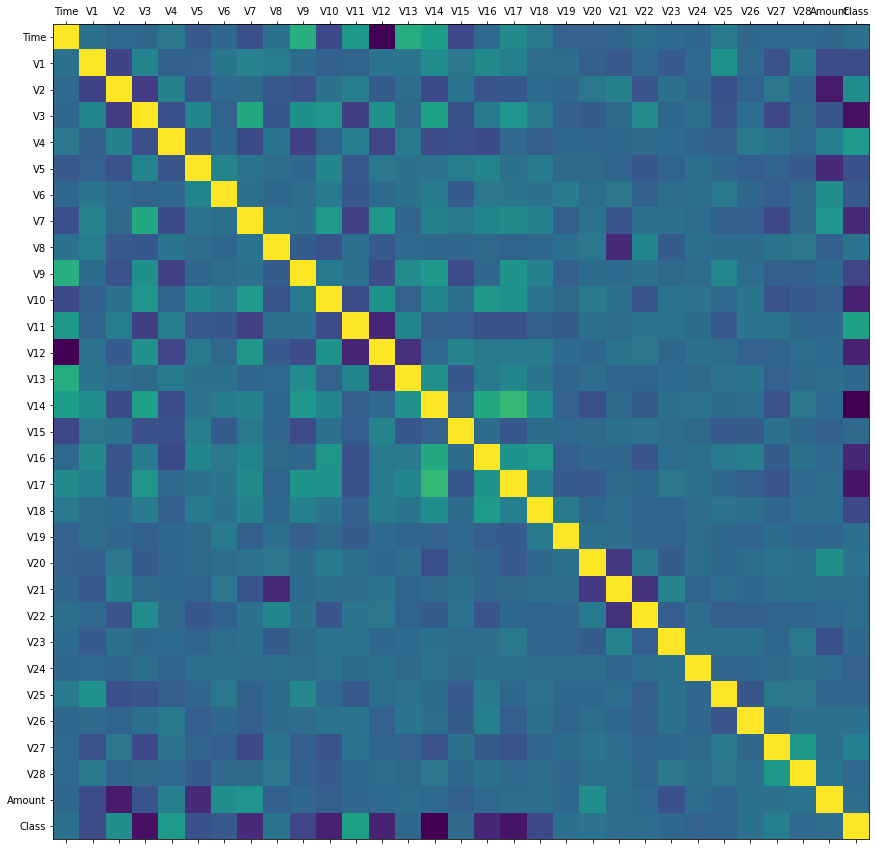

In [25]:
plot_corr(df_cc2)

## VERIFICANDO QUAIS AS PRINCIPAIS VARIÁVEIS, AS MAIS IMPORTANTES:

In [26]:
# Para verificar quais colunas/variáveis são as mais importantes,
# vou executar a função já criada: seleciona_colunas_relevantes(modelo, X_treinamento, X_teste, threshold = 0.05)

seleciona_colunas_relevantes(modelo = ml_DT,X_treinamento = X_treinamento, X_teste = X_teste)

/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)



********** COLUNAS Relevantes ******
[12 15 17]


(array([[ 1.46796278, -1.88639013,  1.04641545],
        [-2.53507653,  0.56252422,  0.23682534],
        [ 0.91213358, -0.72219285, -0.53231629],
        ...,
        [ 1.26503375,  0.56504941, -0.95096273],
        [-1.99083711,  0.46734464,  0.61605017],
        [ 0.06443944,  0.97912334, -0.59036011]]),
 array([[-0.82535974, -0.46420694,  0.51908598],
        [-1.70623292, -0.49732695,  0.13049473],
        [-1.20923164,  0.14147256, -0.16622207],
        ...,
        [-2.84743407, -1.63203286,  0.39412851],
        [-1.85346181, -0.76322193, -0.24240143],
        [-2.02312058, -0.09744221,  0.39238383]]))

/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


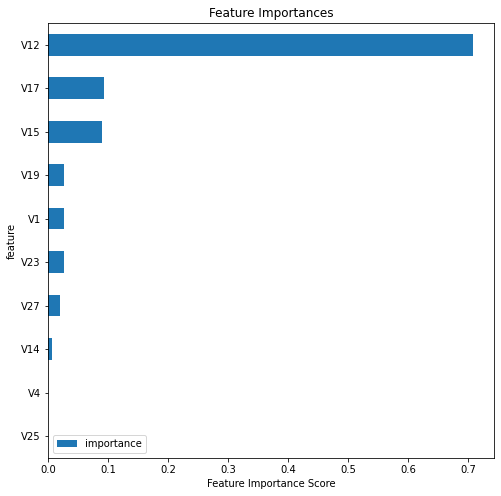

,importance
feature,
V25,0.000000
V4,0.000096
V14,0.006757
V27,0.020354
V23,0.026477
V1,0.027039
V19,0.027130
V15,0.090081
V17,0.093557


In [27]:
# Testando agora com a outra função para ver as colunas relevantes:
# mostra_feature_importances(clf, X_treinamento, y_treinamento=None, top_n=10, figsize=(8,8), print_table=False, title="Feature Importances")

mostra_feature_importances(ml_DT,X_treinamento,y_treinamento)  

In [28]:
df_cc2.head(1)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.5516,-0.617801,-0.99139,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0


# mostou-se importantes V12, V17, V15,V23,V27,V14, em ambas as funções rodadas.

In [29]:
# RESOLVI então reduzir as colunas/variáveis preditivas apenas para as acima indicadas.
# Para isso, vou pegar novamente o df_cc2, e gerar novos df_X, apenas com as colunas importantes, e então
# criar novos X_treinamento, X_teste, y_treinamento, y_teste

df_cc3 = df_cc2.copy()
df_cc3.head(2)



,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0


In [30]:
df_cc3.drop(columns=['V1','V2','V3','V4','V5','V6','V7','V8','V9','V10','V11','V13','V16','V18',
                         'V19','V20','V21','V22','V24','V25','V26','V28','Class'], axis=1, inplace=True)


In [31]:
df_X = df_cc3.copy()
df_X.head(2)

,Time,V12,V14,V15,V17,V23,V27,Amount
0,0,-0.617801,-0.311169,1.468177,0.207971,-0.110474,0.133558,149.62
1,0,1.065235,-0.143772,0.635558,-0.114805,0.101288,-0.008983,2.69


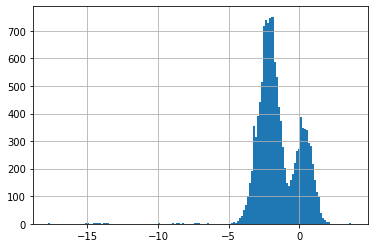

In [32]:
df_X['V12'].hist(bins = 150);

  

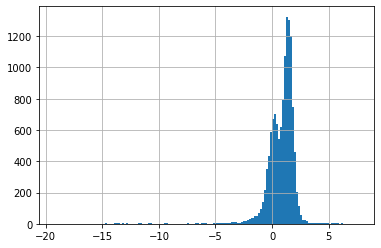

In [33]:
df_X['V14'].hist(bins = 150);


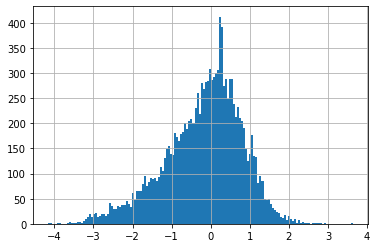

In [34]:
df_X['V15'].hist(bins = 150);



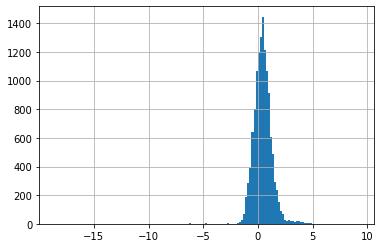

In [35]:
df_X['V17'].hist(bins = 150);

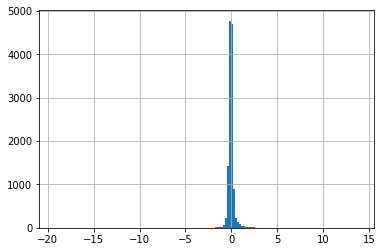

In [36]:
df_X['V23'].hist(bins = 150);


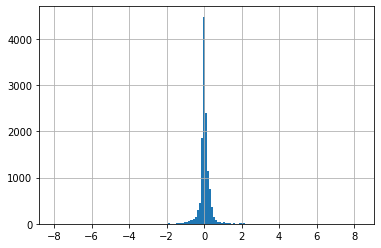

In [37]:
df_X['V27'].hist(bins = 150)

# Análise das colunas preditivas eleitas como importantes quanto à curva de distribuição

<Figure size 720x576 with 0 Axes>

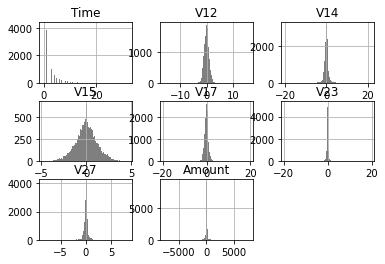

In [38]:
# USANDO um comando reduzido do matplotlib.pyplot
plt.figure(figsize=(10,8))
df_X.diff(axis=0, periods=1).hist(color = 'k', alpha = 0.5, bins = 100);

## Tentar normalizar as variáveis

In [39]:
# Excluindo a coluna 'Time' que não tem serventia também.
df_X.drop(columns = ['Time'], axis=1, inplace=True)
df_X

,V12,V14,V15,V17,V23,V27,Amount
0,-0.617801,-0.311169,1.468177,0.207971,-0.110474,0.133558,149.62
1,1.065235,-0.143772,0.635558,-0.114805,0.101288,-0.008983,2.69
2,0.066084,-0.165946,2.345865,1.109969,0.909412,-0.055353,378.66
3,0.178228,-0.287924,-0.631418,-0.684093,-0.190321,0.062723,123.50
4,0.538196,-1.119670,0.175121,-0.237033,-0.137458,0.219422,69.99
...,...,...,...,...,...,...,...
12836,-2.463177,1.078202,-0.353184,0.560170,0.021372,-0.067625,23.27
12837,-3.026862,-0.878371,0.412419,4.071892,0.012378,0.078616,1.00
12838,-1.944870,1.113404,-0.813064,0.802003,-0.648152,0.053918,10.00
12839,-2.428955,1.473073,0.616349,0.009298,-0.029329,-0.048843,87.00


In [40]:
# Do describe(), é possível ver que há muito provavelmente outliers no df_X
df_X.describe()

,V12,V14,V15,V17,V23,V27,Amount
count,12841.000000,12841.000000,12841.000000,12841.000000,12841.000000,12841.000000,12841.000000
mean,-1.494439,0.815934,-0.177547,0.393921,-0.035406,0.011375,62.219386
std,1.544952,1.331752,0.981075,1.158501,0.496013,0.401608,175.780115
min,-17.769143,-19.214325,-4.152532,-18.587366,-19.254328,-7.976100,0.000000
25%,-2.442860,0.218535,-0.759873,-0.078526,-0.171847,-0.077529,5.490000
50%,-1.817630,1.090067,-0.041798,0.392384,-0.044329,-0.000787,15.300000
75%,-0.248728,1.544681,0.504464,0.873357,0.071117,0.101575,50.000000
max,3.774837,7.692209,3.635042,9.253526,13.876221,8.254376,7712.430000


## Outliers
###Para tratar os outliers, vamos voltar então ao dataframe com todos os dados, incluindo a coluna target, já tratado os missing values

 

In [41]:
# Recompondo o dataframe original, mas apenas com as colunas relevantes,
# com a coluna target, e com os missing values já tratados.
# Precisamos agora tratar os outliers
df_cc3.head()
df_cc4 = pd.concat([df_cc3, df_y], axis=1)
df_cc4.head()

,Time,V12,V14,V15,V17,V23,V27,Amount,Class
0,0,-0.617801,-0.311169,1.468177,0.207971,-0.110474,0.133558,149.62,0.0
1,0,1.065235,-0.143772,0.635558,-0.114805,0.101288,-0.008983,2.69,0.0
2,1,0.066084,-0.165946,2.345865,1.109969,0.909412,-0.055353,378.66,0.0
3,1,0.178228,-0.287924,-0.631418,-0.684093,-0.190321,0.062723,123.50,0.0
4,2,0.538196,-1.119670,0.175121,-0.237033,-0.137458,0.219422,69.99,0.0


In [42]:
# Retirando a coluna Time QUE não serve.
df_cc4.drop(columns=['Time','Amount'], axis=1, inplace=True)
df_cc4.head()

,V12,V14,V15,V17,V23,V27,Class
0,-0.617801,-0.311169,1.468177,0.207971,-0.110474,0.133558,0.0
1,1.065235,-0.143772,0.635558,-0.114805,0.101288,-0.008983,0.0
2,0.066084,-0.165946,2.345865,1.109969,0.909412,-0.055353,0.0
3,0.178228,-0.287924,-0.631418,-0.684093,-0.190321,0.062723,0.0
4,0.538196,-1.119670,0.175121,-0.237033,-0.137458,0.219422,0.0


In [43]:
df_cc4['Class'].value_counts()

0.0    12785
1.0       56
Name: Class, dtype: int64

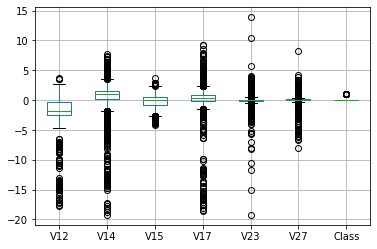

In [44]:
# Função para plotar o Boxplot
colunas = df_cc4.columns
df_cc4.boxplot()

In [45]:
df_cc5 = df_cc4.copy()
df_cc5.head()

,V12,V14,V15,V17,V23,V27,Class
0,-0.617801,-0.311169,1.468177,0.207971,-0.110474,0.133558,0.0
1,1.065235,-0.143772,0.635558,-0.114805,0.101288,-0.008983,0.0
2,0.066084,-0.165946,2.345865,1.109969,0.909412,-0.055353,0.0
3,0.178228,-0.287924,-0.631418,-0.684093,-0.190321,0.062723,0.0
4,0.538196,-1.119670,0.175121,-0.237033,-0.137458,0.219422,0.0


In [46]:
# Outlier do V12
q1_v12, q3_v12 = df_cc5['V12'].quantile([0.25,0.75]).to_list()
iqr_v12 = q3_v12 - q1_v12
outlier_v12_inferior = q1_v12 - 1.5 * iqr_v12
outlier_v12_superior = q3_v12 + 1.5 * iqr_v12
outlier_v12_superior, outlier_v12_inferior


(3.0424686575000006, -5.7340567065000005)

In [47]:
# Outliers superiores do V12
colunas = df_cc5.columns
df_outliers_v12 = df_cc5[colunas]
df_outliers_v12[df_outliers_v12['V12'] > outlier_v12_superior].sort_values(by = ['V12'], ascending = False).head(10)

,V12,V14,V15,V17,V23,V27,Class
2957,3.774837,4.197010,-1.059259,1.540329,2.009214,-0.031049,0.0
2954,3.607076,3.952664,-1.035516,1.381819,1.943902,-0.016154,0.0
2951,3.606761,3.991662,0.752753,2.216999,-0.200435,-0.132891,0.0


In [48]:
# Vamos tratar os outliers. Colocar o valor superior para os que ultrapassarem, e inferior para os que ultrapassarem 
# no sentido inferior.
colunas = ['V12','V14','V15', 'V17','V23','V27']
for i in colunas:
    q1_v, q3_v = df_cc5[i].quantile([0.25,0.75]).to_list()
    iqr_v = q3_v - q1_v
    outlier_v_inferior = q1_v - 1.5 * iqr_v
    outlier_v_superior = q3_v + 1.5 * iqr_v
    df_cc5.loc[df_cc5[i] > outlier_v_superior, i] = outlier_v_superior
    df_cc5.loc[df_cc5[i] < outlier_v_inferior, i] = outlier_v_inferior

In [49]:
# Conferindo se ainda existem valores superiores ou inferiores aos limites minimo e máximos fixados
# Como vemos abaixo, os resultados das duas células seguintes, não mais há outliers no v12, TOMADO POR EXEMPLO.

colunas = df_cc5.columns
df_outliers_v12 = df_cc5[colunas]
df_outliers_v12[df_outliers_v12['V12'] > outlier_v12_superior].sort_values(by = ['V12'], ascending = False).head(10)



,V12,V14,V15,V17,V23,V27,Class


In [50]:
df_outliers_v12[df_outliers_v12['V12'] < outlier_v12_inferior].sort_values(by = ['V12'], ascending = False).head(5)

,V12,V14,V15,V17,V23,V27,Class


In [51]:
# No Describe, percebemos que o mínimo passou a ser o limite inferior calculado no boxplot,
# e o máximo, o limite superior calculado para o boxplot.
df_cc5.describe()


,V12,V14,V15,V17,V23,V27,Class
count,12841.000000,12841.000000,12841.000000,12841.000000,12841.000000,12841.000000,12841.000000
mean,-1.465186,0.873159,-0.172496,0.413211,-0.045537,0.018246,0.004361
std,1.376627,0.934724,0.964779,0.739668,0.210602,0.176621,0.065897
min,-5.734057,-1.770684,-2.656378,-1.506350,-0.536294,-0.346184,0.000000
25%,-2.442860,0.218535,-0.759873,-0.078526,-0.171847,-0.077529,0.000000
50%,-1.817630,1.090067,-0.041798,0.392384,-0.044329,-0.000787,0.000000
75%,-0.248728,1.544681,0.504464,0.873357,0.071117,0.101575,0.000000
max,3.042469,3.533899,2.400969,2.301181,0.435564,0.370230,1.000000


## TRATADOS OS OUTLIERS

## VAMOS FAZER A TRANSFORMAÇÃO YEO-JOHNSON

In [52]:
df_cc5.drop(columns = ['Class'], axis=1, inplace=True)
df_cc5.head()

,V12,V14,V15,V17,V23,V27
0,-0.617801,-0.311169,1.468177,0.207971,-0.110474,0.133558
1,1.065235,-0.143772,0.635558,-0.114805,0.101288,-0.008983
2,0.066084,-0.165946,2.345865,1.109969,0.435564,-0.055353
3,0.178228,-0.287924,-0.631418,-0.684093,-0.190321,0.062723
4,0.538196,-1.119670,0.175121,-0.237033,-0.137458,0.219422


In [53]:
df_cc5.shape

(12841, 6)

In [54]:
from sklearn.preprocessing import PowerTransformer

In [55]:
yeo_johnson = PowerTransformer(method = 'yeo-johnson', standardize = True)
cc5_yeo_johnson = yeo_johnson.fit_transform(df_cc5)
cc5_yeo_johnson

array([[ 0.6662046 , -1.26866741,  1.97288392, -0.24460062, -0.29265516,
         0.66398827],
       [ 1.74050791, -1.1294815 ,  0.83376157, -0.69617224,  0.70710133,
        -0.13552258],
       [ 1.12911091, -1.14834743,  3.31390349,  0.94318553,  2.21459798,
        -0.40131106],
       ...,
       [-0.31501686,  0.17691909, -0.72449987,  0.54724669, -2.41059149,
         0.22044678],
       [-0.69232539,  0.62161967,  0.8093023 , -0.52034748,  0.09507186,
        -0.36382923],
       [-0.11821986,  0.79147622, -1.53089254,  0.40003663, -0.02605865,
        -0.37783543]])

In [56]:
colunas = ['V12','V14','V15', 'V17','V23','V27']
df_cc5_yeo_johnson = pd.DataFrame(cc5_yeo_johnson, columns = colunas)
df_cc5_yeo_johnson.head(5)

,V12,V14,V15,V17,V23,V27
0,0.666205,-1.268667,1.972884,-0.244601,-0.292655,0.663988
1,1.740508,-1.129482,0.833762,-0.696172,0.707101,-0.135523
2,1.129111,-1.148347,3.313903,0.943186,2.214598,-0.401311
3,1.201093,-1.249766,-0.557270,-1.533635,-0.679522,0.269868
4,1.425613,-1.862560,0.274359,-0.871945,-0.422819,1.133956


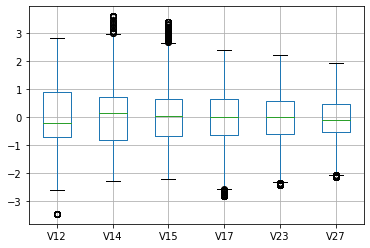

In [57]:
# Função para plotar o Boxplot
colunas = df_cc5_yeo_johnson.columns
df_cc5_yeo_johnson.boxplot()

## Vamos comparar a distribuição das variáveis antes e depois da transformação YEO-JOHNSON

<Figure size 720x576 with 0 Axes>

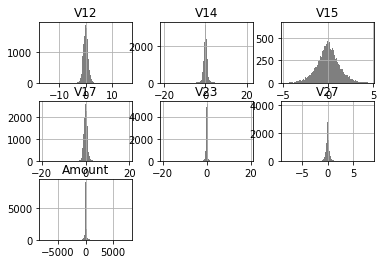

In [58]:
# Antes do tratamento dos outliers e da transformação yeo-johnson:
plt.figure(figsize=(10,8))
df_X.diff(axis=0, periods=1).hist(color = 'k', alpha = 0.5, bins = 100);

<Figure size 864x720 with 0 Axes>

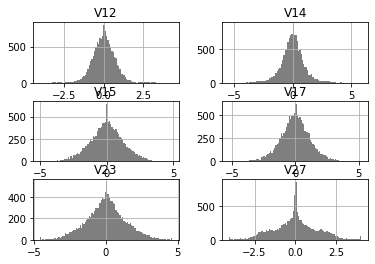

In [59]:
# USANDO um comando reduzido do matplotlib.pyplot
plt.figure(figsize=(12,10))
df_cc5_yeo_johnson.diff(axis=0, periods=1).hist(color = 'k', alpha = 0.5, bins = 100);

# Agora criar o modelo de ML

In [60]:
# VARIÁVEIS GLOBAIS
i_CV = 10 # Número de Cross-Validations
i_Seed = 20111974 # semente por questões de reproducibilidade
f_Test_Size = 0.3 # Proporção do dataframe de validação (outros valores poderiam ser 0.15, 0.20 ou 0.25)

In [61]:
# DataFrame com as variáveis preditivas:
df_X = df_cc5_yeo_johnson.copy()
df_X.head()

,V12,V14,V15,V17,V23,V27
0,0.666205,-1.268667,1.972884,-0.244601,-0.292655,0.663988
1,1.740508,-1.129482,0.833762,-0.696172,0.707101,-0.135523
2,1.129111,-1.148347,3.313903,0.943186,2.214598,-0.401311
3,1.201093,-1.249766,-0.557270,-1.533635,-0.679522,0.269868
4,1.425613,-1.862560,0.274359,-0.871945,-0.422819,1.133956


In [62]:
df_X.shape

(12841, 6)

In [63]:
# DataFrame com a variável target
df_y = df_cc4['Class'].copy()
df_y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
12836    0.0
12837    0.0
12838    0.0
12839    0.0
12840    0.0
Name: Class, Length: 12841, dtype: float64

In [64]:
df_y.value_counts()

0.0    12785
1.0       56
Name: Class, dtype: int64

In [65]:
df_X.shape, df_y.shape

((12841, 6), (12841,))

## Definir a amostra de treinamento e teste

In [66]:
from sklearn.model_selection import train_test_split


In [67]:
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(df_X, df_y, test_size=f_Test_Size, random_state= i_Seed)


In [68]:
X_treinamento.shape, y_treinamento.shape

((8988, 6), (8988,))

In [69]:
X_teste.shape, y_teste.shape

((3853, 6), (3853,))

## Vamos criar o modelo DecisionTreeClassifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier # Este é o nosso classificador

In [89]:
ml_DT = DecisionTreeClassifier(criterion = 'gini', 
                               splitter = 'best', 
                               max_depth = None, 
                               min_samples_split = 2, 
                               min_samples_leaf = 1, 
                               min_weight_fraction_leaf = 0.0, 
                               max_features = None, 
                               random_state = i_Seed, 
                               max_leaf_nodes = None, 
                               min_impurity_decrease = 0.0, 
                               min_impurity_split = None, 
                               class_weight = None, 
                               presort = False)

In [90]:
ml_DT

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=20111974, splitter='best')

In [91]:
# Treimamento do modelo
ml_DT.fit(X_treinamento, y_treinamento)

/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=20111974, splitter='best')

In [92]:
y_pred = ml_DT.predict(X_teste)

## Vamos ver a Matriz de Confusão após treinar o modelo
## Matriz com os dados de teste.


********* CONFUSION MATRIX - PARAMETER TUNNING ***********


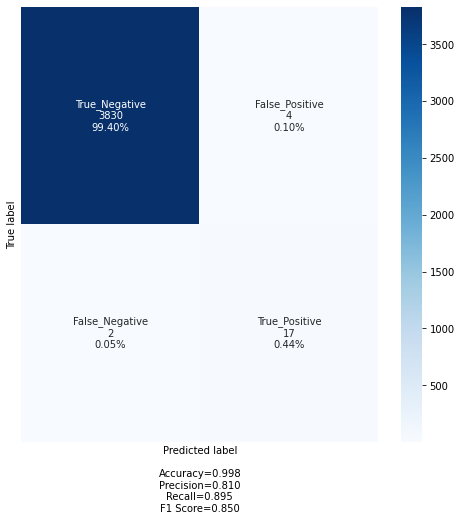

In [93]:
from sklearn.metrics import confusion_matrix # para plotar a confusion matrix
print(f'\n********* CONFUSION MATRIX - PARAMETER TUNNING ***********')
cf_matrix = confusion_matrix(y_teste, y_pred)
cf_labels = ['True_Negative', 'False_Positive', 'False_Negative', 'True_Positive']
cf_categories = ['Zero', 'One']
mostra_confusion_matrix(cf_matrix, group_names = cf_labels, categories = cf_categories)
#return ml_Opt , ml_GridSearchCV.best_params_

In [ ]:
# A MATRIZ DE CONFUSÃO DE UMA ACURÁCIA MUITO ALTA.

## Agora vamos fazer o cross-validation

In [94]:
# VARIÁVEIS GLOBAIS
i_CV = 10 # Número de Cross-Validations
i_Seed = 20111974 # semente por questões de reproducibilidade
f_Test_Size = 0.3 # Proporção do dataframe de validação (outros valores poderiam ser 0.15, 0.20 ou 0.25)

In [95]:
X_treinamento.head(1)

,V12,V14,V15,V17,V23,V27
2703,1.972757,-1.565873,-1.623607,0.862154,2.214598,0.351843


In [96]:
y_treinamento.head(1)

2703    0.0
Name: Class, dtype: float64

In [97]:
# Executando a função já disponível neste notebook
from sklearn.model_selection import cross_val_score

a_scores_CV = cross_val_score(ml_DT, X_treinamento, y_treinamento, cv = i_CV)
a_scores_CV

/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress thi

array([1.        , 0.99888765, 0.99777531, 0.99777531, 0.99777531,
       1.        , 1.        , 0.99888765, 0.99777283, 1.        ])

In [98]:
a_scores_CV.mean().round(4)

0.9989

## Tentativa de fazer o GridSearch

In [99]:
# COLUNAS DAS VARIÁVEIS PREDITIVAS
l_colunas = df_X.columns
l_colunas

Index(['V12', 'V14', 'V15', 'V17', 'V23', 'V27'], dtype='object')

In [100]:
# Hiperparâmetros: colocando espaço de iteração dos hiperparâmetros para o GridSearch.
d_hiperparametros_DT = {"criterion": ["gini", "entropy"], 
                  "min_samples_split": [2, 5, 10, 30, 50, 70, 90, 120, 150, 180, 210, 240, 270, 350, 400],
                  "max_depth": [None, 2, 5, 9, 15],
                  "min_samples_leaf": [20, 40, 60, 80, 100],
                  "max_leaf_nodes": [None, 2, 3, 4, 5, 10, 15]}

In [85]:
# Agora, vamos fazer o GRIDSEARCH  com 10 folds i_CV = 10 já foi definido nas variáveis globais lá em cima.
# Vou usar a função criada lá no começo do notebook:
import sklearn
from sklearn.model_selection import GridSearchCV, KFold
from time import time

Fitting 10 folds for each of 5250 candidates, totalling 52500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1910s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  22 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1590s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  44 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done  80 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 116 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    5.0s
[Parallel(n_jobs=-1)]: Done 204 tasks      | elapsed:    5.9s
[Parallel(n_jobs=-1)]: Done 256 tasks      | elapsed:    7.0s
[Parallel(n_jobs=-1)]: Done 308 tasks      | elapsed:    8.0s
[Parallel(n_jo


Parametros otimizados: {'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': None, 'min_samples_leaf': 20, 'min_samples_split': 2}

DecisionTreeClassifier *********************************************************************************************************

********* CROSS-VALIDATION ***********
Média das Acurácias calculadas pelo CV....: 99.81
std médio das Acurácias calculadas pelo CV: 0.11

********* IMPORTÂNCIA DAS COLUNAS ***********
  coluna  importancia
0    V12     0.905366
2    V15     0.060794
3    V17     0.018064
1    V14     0.015775
4    V23     0.000000
5    V27     0.000000

********* CONFUSION MATRIX - PARAMETER TUNNING ***********


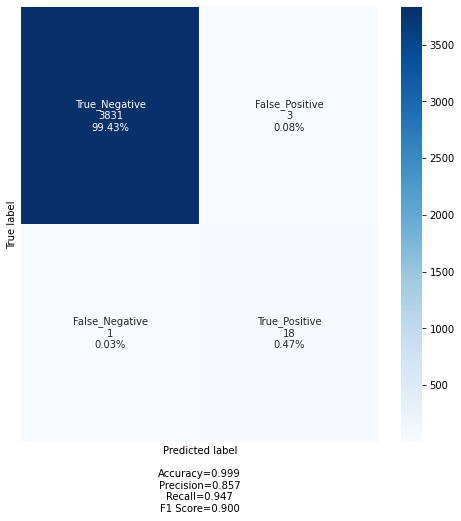

In [106]:
# CHAMANDO A FUNÇÃO:
ml_DT2, best_params = GridSearchOptimizer(ml_DT, 'ml_DT2', d_hiperparametros_DT, X_treinamento, y_treinamento, X_teste, y_teste, i_CV, l_colunas)


/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


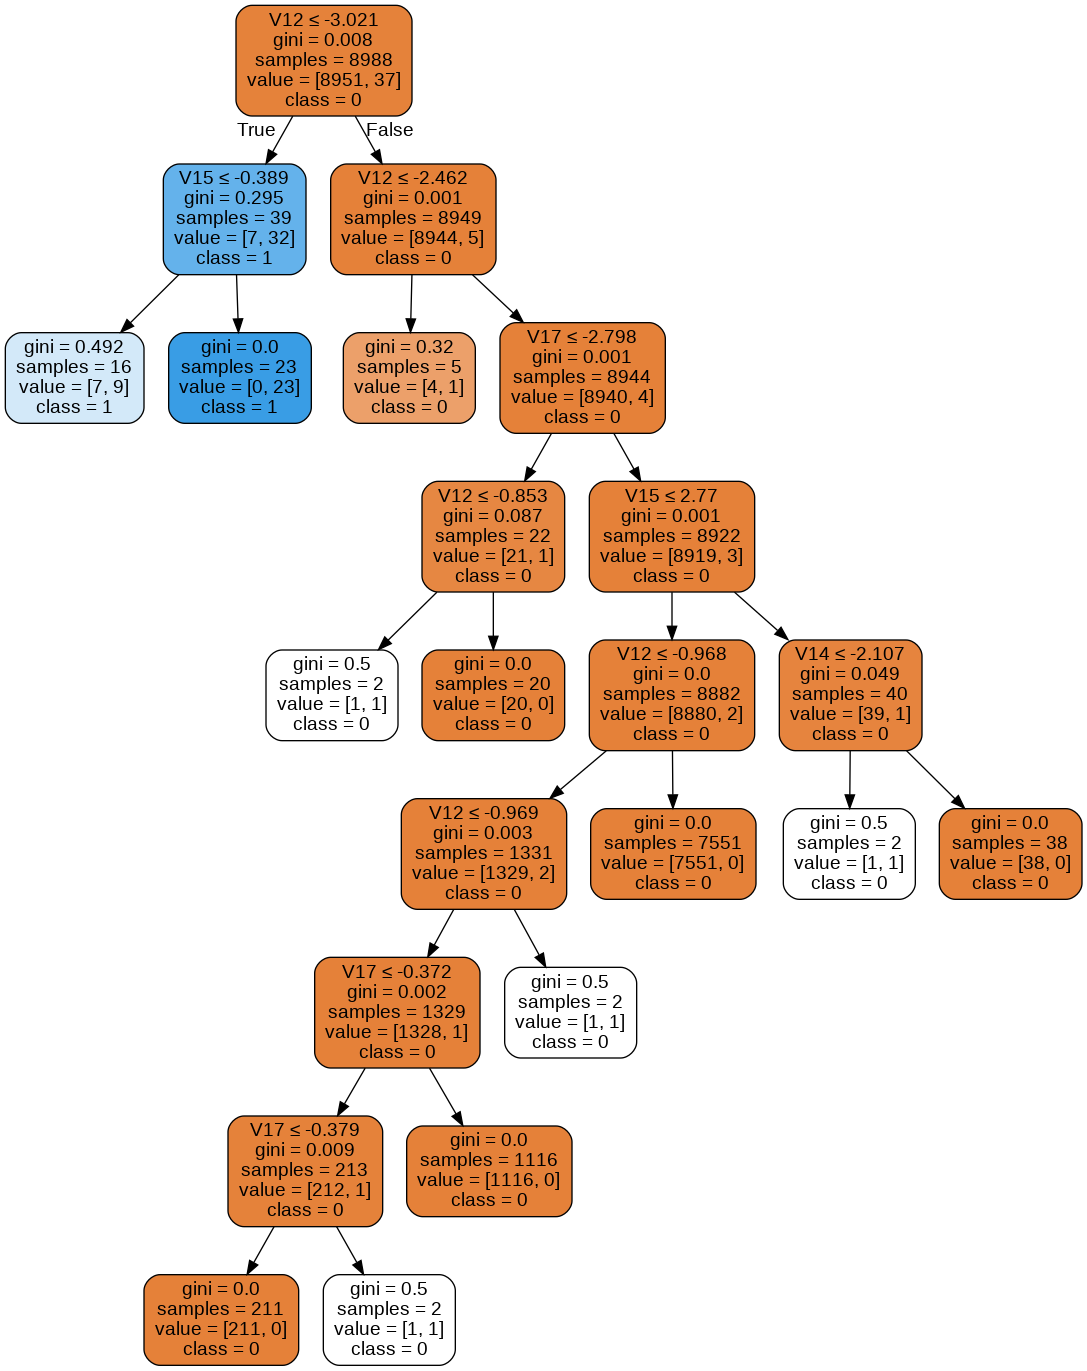

In [107]:
# Visualizar os resultados:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

np.set_printoptions(suppress=True)

dot_data = StringIO()
export_graphviz(ml_DT2, out_file = dot_data, filled = True, rounded = True, special_characters = True, feature_names = l_colunas, class_names = ['0','1'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('DecisionTree.png')
Image(graph.create_png())

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


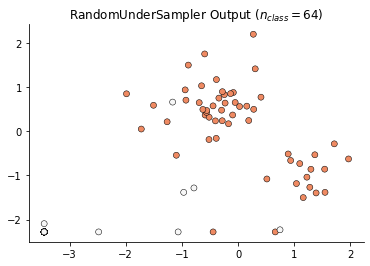

In [109]:
# Tratando amostra desbalanceada com under-sampling
# https://www.kaggle.com/rafjaa/resampling-strategies-for-imbalanced-datasets
# https://imbalanced-learn.org/stable/under_sampling.html#prototype-selection

!pip install imbalanced-learn
import imblearn
from imblearn.under_sampling import RandomUnderSampler

# Selecionando apenas as 'colunas importantes' que eu já havia definido

X = df_X[['V12','V14','V15','V17','V23','V27']]
y = df_y
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)
colors = ['#ef8a62' if v == 0 else '#f7f7f7' if v == 1 else '#67a9cf' for v in y_resampled]
plt.scatter(X_resampled[:, 0], X_resampled[:, 1], c=colors, linewidth=0.5, edgecolor='black')
sns.despine()
plt.title("RandomUnderSampler Output ($n_{class}=64)$")
pass

In [110]:
X_resampled.shape

(112, 6)

In [113]:
type(y_resampled)

numpy.ndarray

In [114]:
df_X2 = pd.DataFrame(X_resampled, columns= ['V12','V14','V15','V17','V23','V27'])

In [115]:
df_X2.head()

,V12,V14,V15,V17,V23,V27
0,1.388692,-1.397284,0.219933,-0.222756,-0.582030,0.790966
1,-0.886257,1.493628,-0.593452,-0.860630,1.013635,-0.317907
2,-0.231399,0.634927,0.072193,2.275981,0.693088,0.011928
3,-0.097289,0.365332,-0.463035,1.182234,0.063467,-0.070907
4,1.224761,-1.040400,1.534369,-1.532410,-1.699749,1.336905


In [117]:
df_y2 = pd.DataFrame(y_resampled, columns = ['Class'])

In [118]:
df_y2.head()

,Class
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [119]:
y_resampled

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [120]:
# Definindo amostras de treinamento e teste (30%):
# utilizando df_X2 e df_y2, que são as resultantes da undersampling
from sklearn.model_selection import train_test_split
X_treinamento, X_teste, y_treinamento, y_teste = train_test_split(df_X2, df_y2, test_size = f_Test_Size, random_state = i_Seed)

In [121]:
X_treinamento.head()

,V12,V14,V15,V17,V23,V27
66,-3.452272,-2.278478,1.726846,-2.810909,2.214598,1.940849
20,1.541338,-0.859733,0.344805,-0.036804,0.033455,-0.269664
37,1.097810,-0.733885,0.762285,-0.643227,0.999089,-0.303992
28,-0.518155,-0.189686,0.185429,0.405143,0.213834,1.728698
19,-0.403863,0.232186,-1.622335,-0.141673,-0.009603,-1.297434


In [122]:
from sklearn.tree import DecisionTreeClassifier # Library para Decision Tree (Classificação)

ml_DT = DecisionTreeClassifier(criterion = 'gini', 
                               splitter = 'best', 
                               max_depth = None, 
                               min_samples_split = 2, 
                               min_samples_leaf = 1, 
                               min_weight_fraction_leaf = 0.0, 
                               max_features = None, 
                               random_state = i_Seed, 
                               max_leaf_nodes = None, 
                               min_impurity_decrease = 0.0, 
                               min_impurity_split = None, 
                               class_weight = None, 
                               presort = False)


In [123]:
ml_DT

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=20111974, splitter='best')

In [124]:
ml_DT.fit(X_treinamento, y_treinamento)

/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=20111974, splitter='best')

In [125]:
a_scores_CV = funcao_cross_val_score(ml_DT, X_treinamento, y_treinamento, i_CV)

Média das Acurácias calculadas pelo CV....: 93.57
std médio das Acurácias calculadas pelo CV: 8.53


/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress this warning by not passing any value to the 'presort' parameter.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/tree/_classes.py:319: FutureWarning: The parameter 'presort' is deprecated and has no effect. It will be removed in v0.24. You can suppress thi

In [126]:
a_scores_CV

array([1.        , 1.        , 1.        , 0.875     , 1.        ,
       1.        , 0.75      , 0.875     , 1.        , 0.85714286])

In [127]:
# Matriz de confusão
# Fazer predições usando o classificados DecisionTree para deduzir na amostra de teste:
y_pred = ml_DT.predict(X_teste)

In [128]:
y_pred

array([1., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 0., 0., 0., 1., 1., 0., 1.])

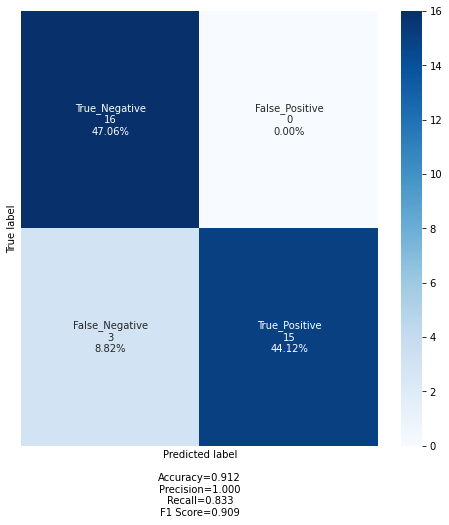

In [129]:
cf_matrix = confusion_matrix(y_teste, y_pred)
cf_labels = ['True_Negative', 'False_Positive', 'False_Negative', 'True_Positive']
cf_categories = ['Zero', 'One']
mostra_confusion_matrix(cf_matrix, group_names= cf_labels, categories= cf_categories)

In [130]:
l_colunas = df_X2.columns       # são aquelas 6 colunas consideradas importantes 

In [131]:
l_colunas

Index(['V12', 'V14', 'V15', 'V17', 'V23', 'V27'], dtype='object')

Fitting 10 folds for each of 5250 candidates, totalling 52500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1940s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0260s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0445s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1081s.) Setting batch_size=16.
[Parallel(n_jobs=-1)]: Done  72 tasks      | elapsed:    1.7s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1799s.) Setting batch_size=32.
[Parallel(n_jobs=-1)]: Done 296 tasks      | elapsed:    2.7s
[Parallel(n_jobs=-1)]: Done 584 tasks      | elapsed:    3.8s
[Parallel(n


Parametros otimizados: {'criterion': 'gini', 'max_depth': None, 'max_leaf_nodes': None, 'min_samples_leaf': 20, 'min_samples_split': 2}

DecisionTreeClassifier *********************************************************************************************************

********* CROSS-VALIDATION ***********
Média das Acurácias calculadas pelo CV....: 93.57
std médio das Acurácias calculadas pelo CV: 8.53

********* IMPORTÂNCIA DAS COLUNAS ***********
  coluna  importancia
0    V12     0.961461
1    V14     0.038539
2    V15     0.000000
3    V17     0.000000
4    V23     0.000000
5    V27     0.000000

********* CONFUSION MATRIX - PARAMETER TUNNING ***********


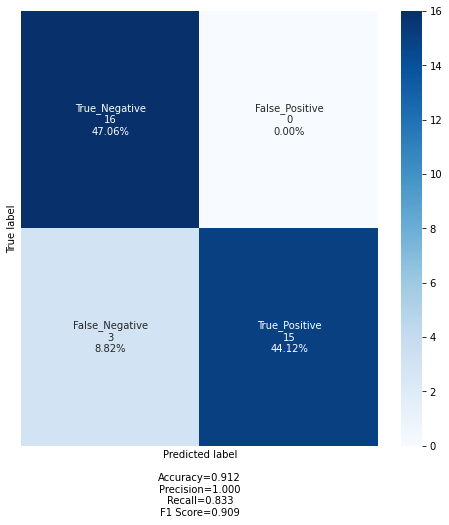

In [132]:
ml_DT2, best_params = GridSearchOptimizer(ml_DT, 'ml_DT2', d_hiperparametros_DT, X_treinamento, y_treinamento, X_teste, y_teste, i_CV, l_colunas)